<a href="https://colab.research.google.com/github/kuolunwang/Image-Processing/blob/main/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# library
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math
%matplotlib inline

In [ ]:
# load picture from google drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# loaded the image in grayscale
image = cv2.imread('/content/drive/MyDrive/Bird 2 degraded.tif',0)

In [ ]:
# convert from uint8 into float32
image_float32 = np.float32(image)

# Computed the 2-d discrete Fourier Transform
dft = np.fft.fft2(image_float32)

# Shift the zero-frequency component to the center of the spectrum.
dft_shift = np.fft.fftshift(dft) 

# compute magnitude spectrum
one = np.ones(dft_shift.shape[:2])
magnitude_spectrum = np.log(one + np.abs(dft_shift)) / np.log(np.max(np.abs(dft_shift))+1)

In [ ]:
# plot magnitude spectrum of degraded image
plt.imshow(magnitude_spectrum, cmap = "gray")
plt.colorbar()
plt.title("Magnitude Spectrum of degraded image")

In [ ]:
# degradation model H
H = np.zeros(magnitude_spectrum.shape[:2],np.float32)
k = 0.001 # mild turbulence
for u in range(H.shape[0]):
  for v in range(H.shape[1]):
    H[u][v] = math.exp(-k*((u-H.shape[0]/2)**2+(v-H.shape[1]/2)**2)**(5/6))
H_mag = np.log(H+1) / np.log(np.max(H)+1)

In [ ]:
# plot magnitude of H 
plt.imshow(H_mag, cmap = "gray")
plt.colorbar()
plt.title("Magnitude Spectrum of H")

In [ ]:
# calculate distance  
def distance(x,y,cx,cy):
  return ((x-cx)**2+(y-cy)**2)**0.5

In [ ]:
# get mask with different radius
def gen_mask(mask,radius):

  result = np.zeros(mask.shape,dtype=np.float32)
  cx, cy = mask.shape[0]//2, mask.shape[1]//2

  for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
      d = distance(i,j,cx,cy)
      if d < radius:
        result[i,j] = mask[i,j]
      else:
        result[i,j] = 1
  return result

<Figure size 432x288 with 0 Axes>

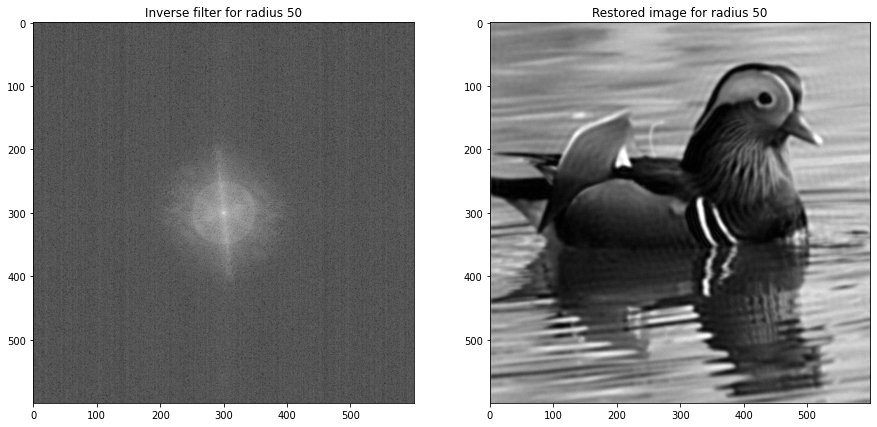

<Figure size 432x288 with 0 Axes>

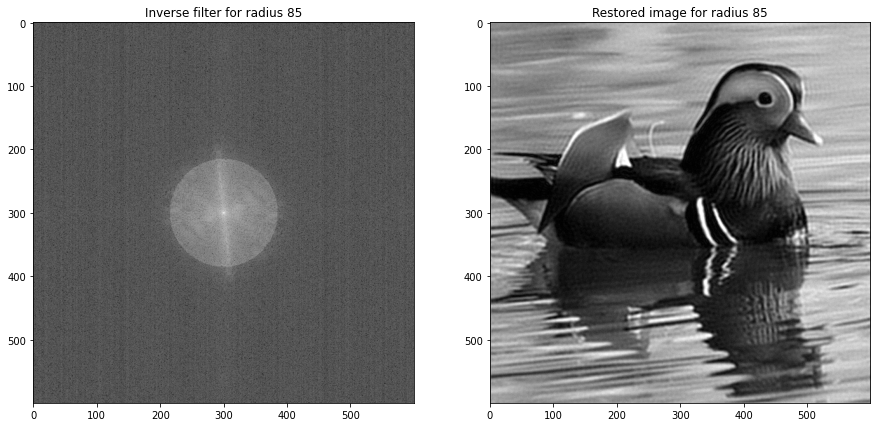

<Figure size 432x288 with 0 Axes>

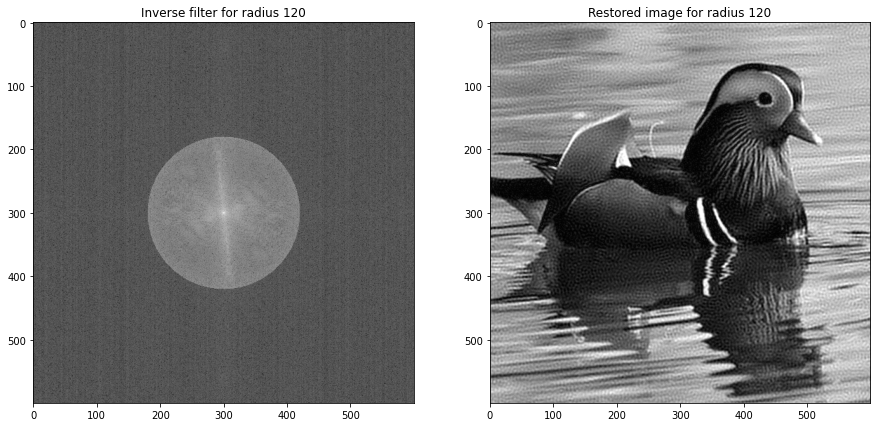

In [ ]:
# plot restored image with three radius
for d in [50,85,120]:
  output=dft_shift/gen_mask(H,d)
  one = np.ones(output.shape[:2])
  output_mag = np.log(one + np.abs(output)) / np.log(np.max(np.abs(output))+1)

  fig = plt.figure()
  plt.figure(figsize=(15,9))
  plt.subplot(1, 2, 1)
  plt.imshow(output_mag, cmap = "gray")
  plt.title("Inverse filter for radius %d" %d) 

  f_inv = np.fft.ifftshift(output)
  f = np.fft.ifft2(f_inv)

  f = np.clip(np.abs(f),0,255)
  plt.subplot(1, 2, 2)
  plt.imshow(f, cmap = "gray")
  plt.title("Restored image for radius %d" %d)